# Диод для молекул в виде клапанной структуры на торце нанотрубки

В работе "Синтетический «демон» Максвелла", опубликованной в журнале «Химия и жизнь», 2001, №12 (http://daju.narod.ru/Maxwell/SintMaxwDem.htm) мною была сформулирована следующая идея: "для реализации идеи Максвелла ... нужно создать такую молекулярную систему, в которой пространственные затруднения для теплового движения молекул рабочей жидкости в одном направлении были бы меньшими, чем в противоположном."

Данную идею я пытался реализовать в следующих работах: 

- "Жидкокристаллический двигатель или акустомеханический преобразователь", 4-6 января 2010 г – 17 июля 2010 г., http://liquidcrystalosmos.narod.ru/liquidcrystalengine.htm

- Жидкокристаллический осмос или о возможности нарушения принципа детального равновесия в жидкокристаллической дисклинации, 17.11.2010, http://liquidcrystalosmos.narod.ru/liquidcrystalosmos.htm

- Жидкокристаллический осмос или о возможности нарушения принципа детального равновесия в жидкокристаллической дисклинации, переработанный и исправленный вариант, Dec 15, 2022,  https://nbviewer.org/github/daju1/articles/blob/master/liquidcrystalosmos/liquidcrystalosmos.ipynb

- Геометрический диод для молекул, https://nbviewer.org/github/daju1/articles/blob/master/diode_for_molecules/diode_for_molecules.ipynb

Для конфигурации клапанной структуры внутри нанотрубки был выполнен расчёт методом молекулярной динамики. За основу молекулярной модели была взята

https://github.com/daju1/moldyn/blob/main/nanotube_12_membrane_4_tricyanomethyl/

На всех осях были заданы периодические граничные условия. Это значит, что если атом вылетел за пределы границы расчётной ячейки, то считается что он залетел с той же скоростью но с противоположной стороны.


исходные коды программы ghemical, которую я использую для МД моделирования, взяты отсюда
https://www.bioinformatics.org/ghemical/download/release20111012/

Но в целях проведения эксперимента данные коды были модифицированы набором патчей

https://github.com/daju1/winlibghemical/tree/master/linux/release20111012

который в среде докер 

https://github.com/daju1/winlibghemical/tree/master/linux/release20111012/docker

собираются следующим набором комманд

	make download
	make getcodes
	make all

Был разработаны также и рабочий пример для запуска моделирования из консольной программы без визуального интерфейса

https://github.com/daju1/winlibghemical/blob/master/linux/release20111012/examples/example_moldyn.cpp

А непосредственно для запуска моделирования использовался скрипт на основе

https://github.com/daju1/winlibghemical/blob/master/linux/release20111012/examples/moldyn_nanotube12_cyanoform4.sh

В алгоритм программы МД закладываются потенциалы взаимодействия атомов друг с другом, в частности

https://ru.wikipedia.org/wiki/Потенциал_Леннард-Джонса

В программе, которую использовал я, используется

http://open-babel.readthedocs.io/en/latest/Forcefields/ghemical.html


# опции алгоритма МД

B0, B1, B2 в названии файла означает режим оптимизации размера бокса во время процесса МД

B0 - отсутствует оптимизация размера бокса вообще

B1 - оптимизация размера бокса включена постоянно. Этот режим также был включён по умолчанию ранее в предыдущих моделированиях а также в файлах тракторий с отсутствующей буквой B

B2 - только лишь в процессе нагревания и уравновешивания

	enum box_optimization_moldyn_mode
	{
		box_optimization_no = 0,
		box_optimization_always,
		box_optimization_equilibration, // box_optimization just during heating and equilibration
	};

E - алгоритм термостата выключен, моделирование при постоянной энергии

I - инверсия скоростей инициализации начальных скоростей атомов


# Моделирование клапанной структуры на торце нанотрубки

Предварительные исследования данной модели были произведены в работе

Моделирование барьера диффузии инертного газа через клапаннную структуру на торце нанотрубки

Модель нанотрубки (12.0) с клапанной структурой из четырех цианоформных групп на её торце

https://github.com/daju1/moldyn/blob/main/valve_gate_nanotube_12_0_4cyanoforms.pdf

Был сделан следующий вывод:

<p><i>моделирование при фиксировании у пробного атома только лишь z координаты показало, что 

потенциальная энергия деформации мембранной молекулярной системы Epot 12.5 кДж/моль в прямом направлении и 19.5 кДж/моль в обратном направлении

работа проталкивания пробного атома сквозь мембрану prob\_atom\_fz\_integral 14.235 кДж/моль в прямом направлении и 23.384 кДж/моль в обратном направлении (при числе итераций оптимизации 500)

В той молекулярной модели величина барьера по порядкувеличины соответствует величине средней энергии поступательного движения молекул 1/2*R * T = 0,5 * 8.314 * 300/1000 = 1.247 кДж / моль.</i></p>

Для данного моделирования была построена молекулярная система мембраны с порой в виде нанотрубки на торец которой присоединены 4 цианоформных радикала

https://github.com/daju1/moldyn/tree/main/nanotube_12_membrane_4_tricyanomethyl

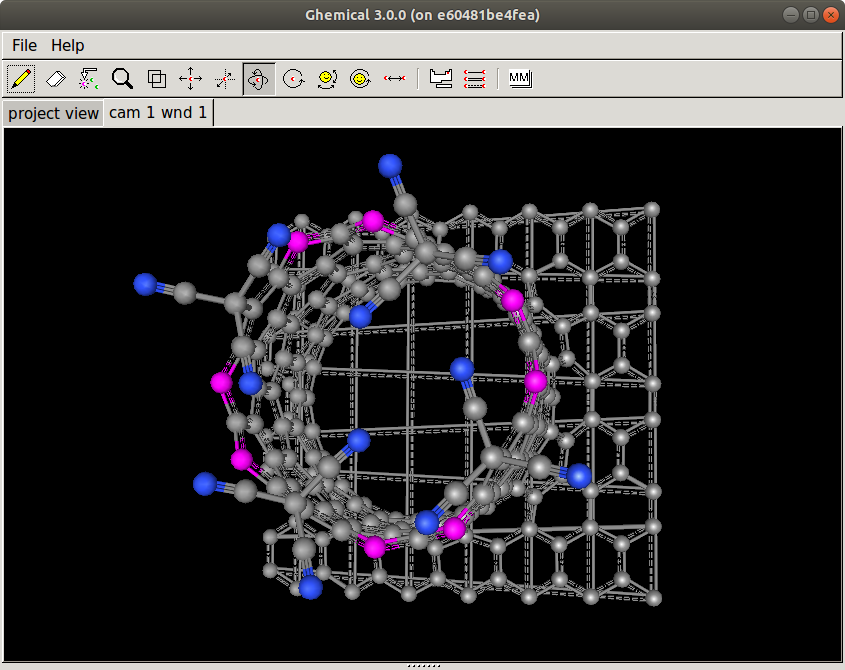

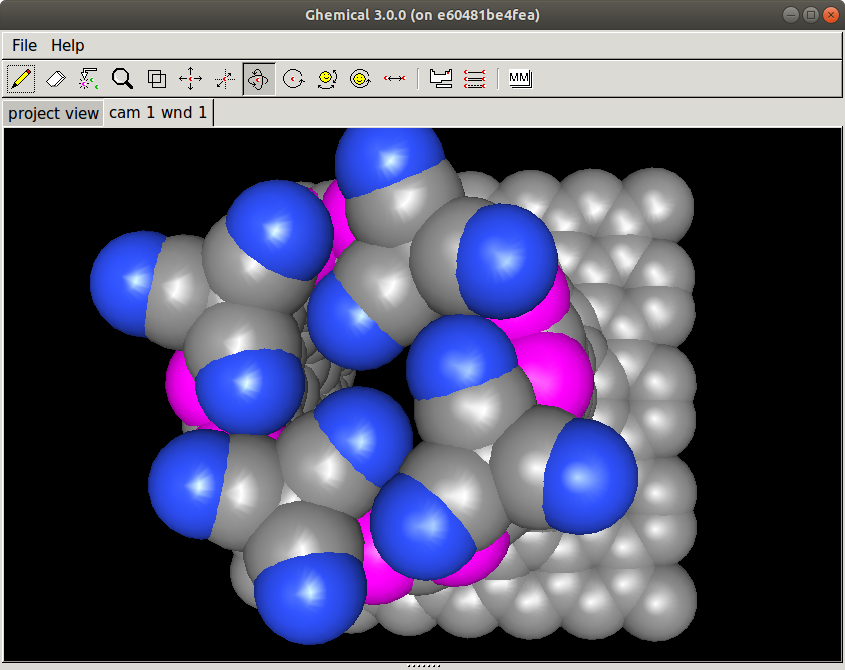

Периодическая ячейка с такой клапанной структурой заполнена молекулами кислорода

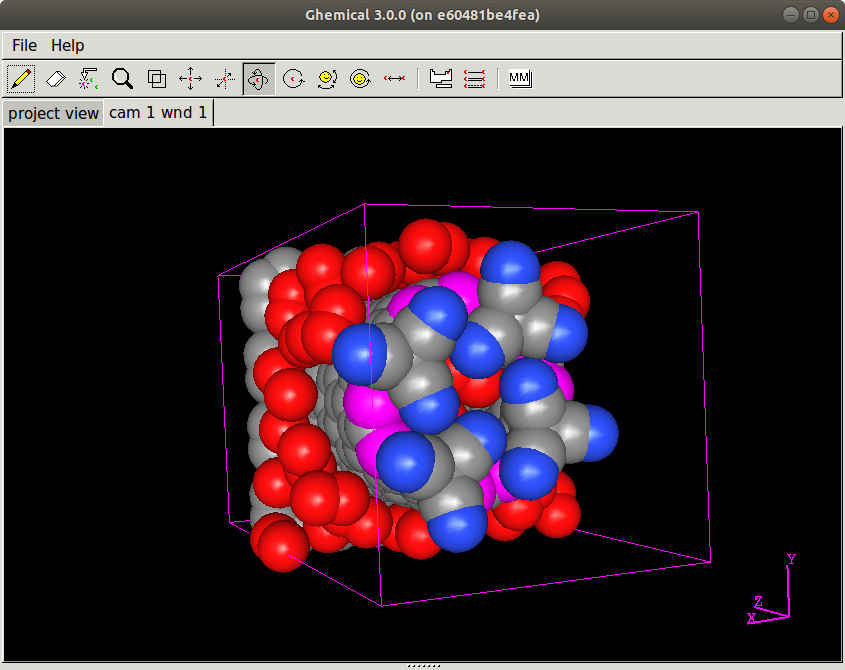

Для презентации результатов моделирования использую следующие функции

# Функция расчёта мощности процесса

In [1]:
def calc_power_old(data, this_is_a_gas):
    global header
    global boundary

    import numpy as np

    data_len = len(data[0])

    start_from = int(0.9 * data_len)
    i_cumulative_mean_velocity_m_s = 21
    i_cumulative_mean_force        = 22
    i_coordinate_cumsum_acceleration = 19
    data_cumulative_mean_velocity_m_s   = data[i_cumulative_mean_velocity_m_s  ][start_from:]
    data_cumulative_mean_force          = data[i_cumulative_mean_force         ][start_from:]
    data_coordinate_cumsum_acceleration = data[i_coordinate_cumsum_acceleration][:]
    
    cumulative_mean_velocity_m_s =  np.mean(data_cumulative_mean_velocity_m_s)
    # внутрипрограмный параметр "сила" (eng->d1) противонаправлен ускорению.
    # Поэтому действительная сила имеет противоположный знак внутрипрограммному параметру "сила"
    cumulative_mean_force        = -np.mean(data_cumulative_mean_force)

    print(header[i_cumulative_mean_velocity_m_s], cumulative_mean_velocity_m_s)
    print(header[i_cumulative_mean_force       ], cumulative_mean_force)

    # площадь ячейки в плоскости xy в кв.м
    s_m_2 = 4*boundary[0]*boundary[1]*(10^-9)^2

    # коэффициент перевода внутрипрограммных единиц измерения давления в Паскали
    p_ed_izm_Pa_per_atom_ = F_ed_izm_Newton_per_atom / s_m_2

    p_os = cumulative_mean_force * p_ed_izm_Pa_per_atom_
    print("p_os, Pascal                      =", p_os)
    V_os = cumulative_mean_velocity_m_s
    print("V_os, m/s                         =", V_os)

    print("coordinate_cumsum_acceleration (nm)", data_coordinate_cumsum_acceleration[data_len-1] - data_coordinate_cumsum_acceleration[0])

    if (this_is_a_gas):
        power = 0.5 * p_os * V_os
        print("power, Watt/m^2              =", power)

In [2]:
def linterp_data(data, j, kx, ky, start_from = 0):
    import numpy as np
    y = data[j][start_from:]
    x = data[0][start_from:]

    t = []
    for i in range(len(x)):
        t += [x[i] * kx]
    A = np.vstack([t, np.ones(len(x))]).T

    
    v = []
    for i in range(len(y)):
        v += [y[i] * ky]

    m, c = np.linalg.lstsq(A, v, rcond=None)[0]
    
    import matplotlib.pyplot as plt
    _ = plt.plot(t, v, 'o', label='Original data', markersize=2)
    _ = plt.plot([  t[0],       t[len(x)-1]    ],
                 [m*t[0] + c, m*t[len(x)-1] + c],
                 'r', label='Fitted line')
    _ = plt.legend()
    plt.show()
    
    return m, c

In [3]:
def calc_power(data_g, data_m, start_from):
    # с помощью линейной интерполяции параметра
    # {"coordinate_cumsum_velocity_and_acceleration","nm"}
    # рассчитаем скорость установившегося дрейфа в м/сек

    kx = time_step_between_traj_records # s
    ky = 1e-9                           # nm --> m

    j_cumsum_force = 11
    j_coordinate_cumsum_velocity_and_acceleration_nm = 20

    j = j_coordinate_cumsum_velocity_and_acceleration_nm

    v_g, _ = linterp_data(data_g, j = j, kx = kx, ky = ky, start_from = start_from)
    v_m, _ = linterp_data(data_m, j = j, kx = kx, ky = ky, start_from = start_from)

    print("V_gas,      m/s               =", v_g)
    print("V_membrane, m/s               =", v_m)

    # площадь ячейки в плоскости xy в кв.м
    s_m_2 = 4*boundary[0]*boundary[1]*(10^-9)^2

    # коэффициент перевода внутрипрограммных единиц измерения давления в Паскали
    p_ed_izm_Pa_per_atom_ = F_ed_izm_Newton_per_atom / s_m_2

    # с помощью линейной интерполяции параметра
    # {"cumsum_force",""}
    # рассчитаем установившееся давление в Па
    # как линеаризованная скорость прироста случайной величины
    # кумулятивная сумма силы приложенной к атомам газа

    kx = traj_frame_save_frq
    ky = p_ed_izm_Pa_per_atom_

    j = j_cumsum_force

    p_g, _ = linterp_data(data_g, j = j, kx = kx, ky = ky, start_from = start_from)
    p_m, _ = linterp_data(data_m, j = j, kx = kx, ky = ky, start_from = start_from)
    print("p_gas,      Pascal            =", -p_g)
    print("p_membrane, Pascal            =", -p_m)

    # внутрипрограмный параметр "сила" (eng->d1) противонаправлен ускорению.
    # Поэтому действительная сила приложенная к атомам газа 
    # имеет противоположный знак внутрипрограммному параметру "сила"

    # Поэтому при расчёте удельной мощности приложенной к атомам газа 
    # умножаем давление приложенное к атомам газа на на скорость атомов газа относительно мембраны 

    power_g = -p_g * (v_g - v_m)
    print("power applied to gas,      Watt/m^2   =", power_g)

    # при расчёте удельной мощности приложенной к мембране 
    # умножаем давление приложенное к мембране на на скорость мембраны 

    power_m = -p_m * v_m
    print("power applied to membrane, Watt/m^2   =", power_m)   

In [4]:
def calc_power_2(data_g, data_m, start_from):
    import numpy as np
    # с помощью усреднения параметра
    # 2 velocity (1.0e+3 m/s)
    # рассчитаем скорость установившегося дрейфа в м/сек

    j_velocity_m_per_s = 2
    j_acceleration = 3
    j_force = 4

    j = j_velocity_m_per_s

    vg = data_g[j][start_from:]
    vm = data_m[j][start_from:]

    mean_v_g = np.mean(vg)
    mean_v_m = np.mean(vm)

    print("mean_v_gas,      m/s            =", mean_v_g)
    print("mean_v_membrane, m/s            =", mean_v_m)

    j = j_acceleration

    ag = data_g[j][start_from:]
    am = data_m[j][start_from:]

    mean_a_g = np.mean(ag)
    mean_a_m = np.mean(am)

    print("mean_a_gas,      1.0e+12 m/s^2  =", mean_a_g)
    print("mean_a_membrane, 1.0e+12 m/s^2  =", mean_a_m)

    print("dt                              = ", traj_tstep1, "1.0e-15 s")

    v_g = mean_v_g + 1.0e-3 * mean_a_g
    v_m = mean_v_m + 1.0e-3 * mean_a_m

    print("V_gas,      m/s               =", v_g)
    print("V_membrane, m/s               =", v_m)

    # площадь ячейки в плоскости xy в кв.м
    s_m_2 = 4*boundary[0]*boundary[1]*(10^-9)^2

    # коэффициент перевода внутрипрограммных единиц измерения давления в Паскали
    p_ed_izm_Pa_per_atom_ = F_ed_izm_Newton_per_atom / s_m_2

    # с помощью усреднения параметра
    # {"force",""}
    # рассчитаем установившееся давление в Па

    j = j_force

    fg = data_g[j][start_from:]
    fm = data_m[j][start_from:]

    p_g = np.mean(fg) * p_ed_izm_Pa_per_atom_
    p_m = np.mean(fm) * p_ed_izm_Pa_per_atom_

    print("p_gas, Pascal                 =", -p_g)
    print("p_membrane, Pascal            =", -p_m)

    # внутрипрограмный параметр "сила" (eng->d1) противонаправлен ускорению.
    # Поэтому действительная сила приложенная к атомам газа 
    # имеет противоположный знак внутрипрограммному параметру "сила"

    # Поэтому при расчёте удельной мощности приложенной к атомам газа 
    # умножаем давление приложенное к атомам газа на на скорость атомов газа относительно мембраны 

    power_g = -p_g * (v_g - v_m)
    print("power applied to gas,      Watt/m^2   =", power_g)

    # при расчёте удельной мощности приложенной к мембране 
    # умножаем давление приложенное к мембране на на скорость мембраны 

    power_m = -p_m * v_m
    print("power applied to membrane, Watt/m^2   =", power_m)   

# Функция загрузки данных моделирования из файла

In [5]:
def fill_data_from_file(fn, print_header = False):
    global header
    data = []
    global boundary
    global time_step_between_traj_records
    global traj_frame_save_frq
    global traj_tstep1
    with open(fn) as file:
        while line := file.readline():
            if line.__contains__("loop"):
                print(line)
                break
            if line.__contains__("the trajectory real_frames"):
                print(line)
            if line.__contains__("the trajectory common time is"):
                print(line)
            if line.__contains__("time step between traj records"):
                time_step_between_traj_records = 1
                print(line)
                time_step_between_traj_records_string = line.strip("time step between traj records").strip("s\n")
                for s in time_step_between_traj_records_string.split("*"):
                    time_step_between_traj_records *= float(s)
            if line.__contains__("traj_frame_save_frq"):
                # "PrintToLog: traj_frame_save_frq 1000 traj_tstep1 2"
                lst = line.split(" ")
                if len(lst) == 5 and lst[1] == 'traj_frame_save_frq':
                    traj_frame_save_frq = float(lst[2])
                    traj_tstep1         = float(lst[4])
                print(line)
            lst = line.split(",")
            if len(lst) < 3:
                lst = line.split(" ")
                if len(lst) == 4 and lst[0] == 'boundary' and float(lst[1]) != 0.0:
                    boundary[0] = float(lst[1])
                    boundary[1] = float(lst[2])
                    boundary[2] = float(lst[3])
                    print ("boundary", boundary)
                continue

            if (None == header):
                header = lst
                header_len = len(header)
                if print_header:
                    print(header)
                for i in range(header_len):
                    data += [[]]
            else:
                for i in range(header_len):
                    if "nan" == lst[i]:
                        print (lst[i])
                        return data
                    if "-nan" == lst[i]:
                        print (lst[i])
                        return data
                for i in range(header_len):
                    value = float(lst[i])
                    data[i] += [value]
    return data

универсальная газовая постоянная = 8.31446262 $Дж\, К^{-1} Моль^{-1}$

$N_A$ ≡ 6,022 140 76 10^23 $моль^{−1}$

In [6]:
R          = 8.31446262
N_Avogadro = 6.02214076 * 10^23
T          = 300

Анализируя внутрипрограммные формулы можно заметить, что второй закон Ньютона записан в виде $F = -\,m \cdot a$. Подставляя использованные в программе единицы измерения

$[F] = [kg/mol] \cdot [1.0e+12\,m/s^2]$

$[F] = [1.0e+12\,Newton/mol]$

$[F] = [1.66053906717385e-12\,Newton/atom]$

Коеффициент перевода единиц силы из внутрипрограмных единиц в Ньютон на атом

In [7]:
# коэффициент перевода внутрипрограммных единиц измерения силы в Ньютоны на моль
F_ed_izm_Newton_per_mol  = 1.0e+12

# коэффициент перевода внутрипрограммных единиц измерения силы в Ньютоны на атом
F_ed_izm_Newton_per_atom = F_ed_izm_Newton_per_mol/N_Avogadro

In [8]:
boundary = [0, 0, 0]

In [9]:
time_step_between_traj_records = None
traj_frame_save_frq = None
traj_tstep1 = None

In [10]:
folder = "nanotube_12_membrane_4_tricyanomethyl"
fn = "12.0_4cyanoforms_O2"
suffix = "B2_E"

# Результат моделирования B2, E 300 K

результат моделирования со следующими опциями

- оптимизация размера бокса - только в процессе инициализации (B2)
- функция термостата выключена, моделирование производилось для постоянной энергии (E)
- инициализация начальных скоростей атомов производилась для температуры 300 К

In [11]:
header = None
data_g = fill_data_from_file(folder + "/" + fn + "." + suffix + ".traj.plots.dim2.gas.txt")
# calc_power_old(data_g, this_is_a_gas = True)

PrintToLog: the trajectory real_frames 25425 does not correspond to 2000000 frames. Will be reset

PrintToLog: traj_frame_save_frq 1000 traj_tstep1 2

time step between traj records 2 * 1.0E-12 s

the trajectory common time is 50.848 * 1.0E-9 s

boundary [0.857716, 0.834297, 1.5]
loop 25424 dc -5.225214e-01 = -1.127228e-04 (-1.125802e-04 + -1.425173e-07) error=-5.224086e-01 -2.226009e-02



In [12]:
header = None
data_m = fill_data_from_file(folder + "/" + fn + "." + suffix + ".traj.plots.dim2.membrane.txt")
# calc_power_old(data_m, this_is_a_gas = False)

PrintToLog: the trajectory real_frames 25425 does not correspond to 2000000 frames. Will be reset

PrintToLog: traj_frame_save_frq 1000 traj_tstep1 2

time step between traj records 2 * 1.0E-12 s

the trajectory common time is 50.848 * 1.0E-9 s

boundary [0.857716, 0.834297, 1.5]
loop 25424 dc -6.996773e-03 = 4.925115e-05 (4.896708e-05 + 2.840644e-07) error=-7.046024e-03 1.028017e-02



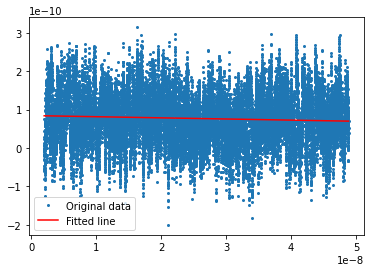

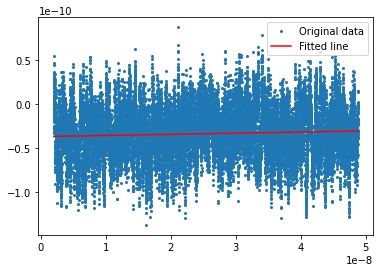

V_gas,      m/s               = -0.0002975502600919388
V_membrane, m/s               = 0.00012985636116479357


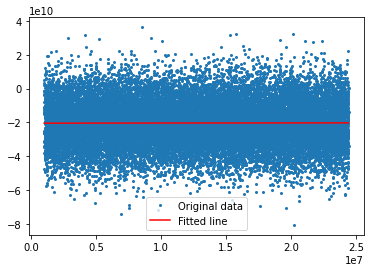

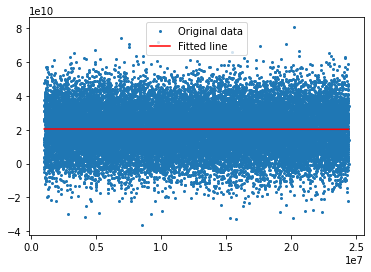

p_gas,      Pascal            = -7.952102211444106
p_membrane, Pascal            = 7.952102211444106
power applied to gas,      Watt/m^2   = 0.003398781138081515
power applied to membrane, Watt/m^2   = 0.0010326310567886395


In [13]:
calc_power(data_g, data_m, start_from = 1000)

# Результат моделирования B2, E 300 K, I

результат моделирования со следующими опциями

- оптимизация размера бокса - только в процессе инициализации (B2)
- функция термостата выключена, моделирование производилось для постоянной энергии (E)
- инициализация начальных скоростей атомов производилась для температуры 300 К
- инверсия скоростей инициализации начальных скоростей атомов (I)

In [14]:
header = None
data_gi = fill_data_from_file(folder + "/" + fn + "." + suffix + "_I.traj.plots.dim2.gas.txt")
# calc_power_old(data_gi, this_is_a_gas = True)

PrintToLog: the trajectory real_frames 26722 does not correspond to 2000000 frames. Will be reset

PrintToLog: traj_frame_save_frq 1000 traj_tstep1 2

time step between traj records 2 * 1.0E-12 s

the trajectory common time is 53.442 * 1.0E-9 s

boundary [0.842107, 0.846368, 1.5]
loop 26721 dc 3.705642e-02 = -1.203985e-04 (-1.205274e-04 + 1.288643e-07) error=3.717682e-02 1.169431e-01



In [15]:
header = None
data_mi = fill_data_from_file(folder + "/" + fn + "." + suffix + "_I.traj.plots.dim2.membrane.txt")
# calc_power_old(data_mi, this_is_a_gas = False)

PrintToLog: the trajectory real_frames 26722 does not correspond to 2000000 frames. Will be reset

PrintToLog: traj_frame_save_frq 1000 traj_tstep1 2

time step between traj records 2 * 1.0E-12 s

the trajectory common time is 53.442 * 1.0E-9 s

boundary [0.842107, 0.846368, 1.5]
loop 26721 dc -1.620004e-02 = 5.506109e-05 (5.511538e-05 + -5.428801e-08) error=-1.625510e-02 -5.399854e-02



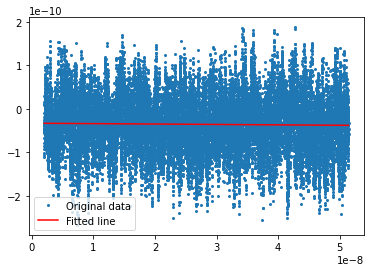

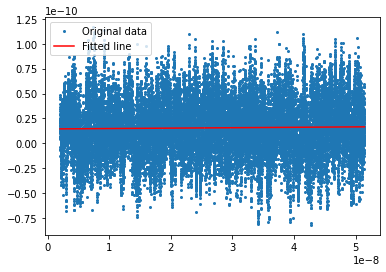

V_gas,      m/s               = -9.4934515562375e-05
V_membrane, m/s               = 4.147701321754822e-05


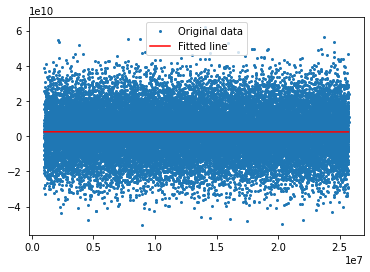

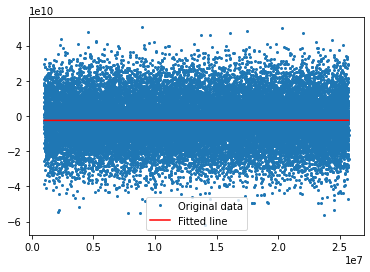

p_gas,      Pascal            = 2.9404971163623768
p_membrane, Pascal            = -2.9404971163623768
power applied to gas,      Watt/m^2   = -0.00040111770701594757
power applied to membrane, Watt/m^2   = -0.00012196303776152473


In [16]:
calc_power(data_gi, data_mi, start_from = 1000)